<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
### Hidden Layer:
### Output Layer:
### Neuron:
### Weight:
### Activation Function:
### Node Map:
### Perceptron:


Input Layer: this is what receives input from our dataset; it's also sometimes referred to as the visible layer as it is the only part that is exposed to our data and that the data interacts with directly

Hidden Layer: it's the layer after the input layer and can only be accessed through the input layer; this layer / these layers are not directly interacted with, however they are inside of the network and perform their functions

Output Layer: this is the final layer; it's purpose is to output a vector of values that is in a format that is suitable for the type of problem we're trying to address

Neuron: it takes each of the input values, multiplies each of them by a weight, sums all of these products up and then passes the sum through an "activation function" the result of which is the final value

Weight: we need a weight for each one of our input nodes; this in conjunction with the bias value gives our network the full range of motion that it needs to find the best way to explain the patterns in the data

Activation Function: decides how much signal to pass onto the next layer; sometimes referred to as a transfer function because they determine how much signal is transferred to the next layer

Node Map: a visual diagram of the architecture or "topology" of our neural network; it shows the path from inputs to outputs; they are often color coded to help us understand the differences in architecture of neural networks

Perceptron: the simplest kind of neural network; it can take any number of inputs and spit out an output

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

inputs -> bias and weights -> neuron (activation function) -> outputs

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import numpy as np

In [2]:
inputs = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])

In [3]:
correct_outputs = [[1], [1], [1], [0]]

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

In [5]:
weights = 2 * np.random.random((2, 1)) - 1

weights

array([[ 0.76709937],
       [-0.19561686]])

In [6]:
weighted_sum = np.dot(inputs, weights)

weighted_sum

array([[ 0.        ],
       [ 0.76709937],
       [-0.19561686],
       [ 0.57148251]])

In [7]:
activated_output = sigmoid(weighted_sum)

activated_output

array([[0.5       ],
       [0.6828931 ],
       [0.45125114],
       [0.63910519]])

In [8]:
error = correct_outputs - activated_output

error

array([[ 0.5       ],
       [ 0.3171069 ],
       [ 0.54874886],
       [-0.63910519]])

Gradient descent/Backpropagation

In [9]:
adjustments = error * sigmoid_derivative(activated_output)

adjustments

array([[ 0.11750186],
       [ 0.07070782],
       [ 0.13043379],
       [-0.14451059]])

In [10]:
weights += np.dot(inputs.T, adjustments)

# So these are our learned weights.

weights

array([[ 0.6932966 ],
       [-0.20969366]])

In [11]:
# So this updates weights 10,000 times, and we hope that this reduces error in
# our predictions.

for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Calculate error.
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the weights.
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training:")
print(weights)
print('\n')
print("Output after training:")
print(activated_output)

Weights after training:
[[ 1.66533454e-16]
 [-2.91433544e-16]]


Output after training:
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


Medium article for Perceptron class code: https://medium.com/@thomascountz/19-line-line-by-line-python-perceptron-b6f113b161f3

In [14]:
class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

In [15]:
training_inputs = []
training_inputs.append(np.array([0, 0]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([1, 1]))

labels = np.array([1, 1, 1, 0])

perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)

inputs = np.array([0, 0])
print(perceptron.predict(inputs))
#=> 1

inputs = np.array([1, 0])
print(perceptron.predict(inputs)) 
#=> 1

inputs = np.array([0, 1])
print(perceptron.predict(inputs))
#=> 1

inputs = np.array([1, 1])
print(perceptron.predict(inputs)) 
#=> 0

1
1
1
0


## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [19]:
import pandas as pd

In [20]:
iris = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv')

In [27]:
iris = iris.drop(columns='Id')

In [28]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
# Grab 50 Iris-versicolor and 50 Iris-setosa.

iris.iloc[145:150, 0:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [34]:
# Only looking at setosa and vesicolor for analysis.

y = iris.iloc[0:100, 4].values

y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [35]:
# Replace the string label with a numeric label.

y = np.where(y == 'Iris-setosa', -1, 1)

y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [37]:
X = iris.iloc[0:100, [0, 2]].values

X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [39]:
import matplotlib.pyplot as plt

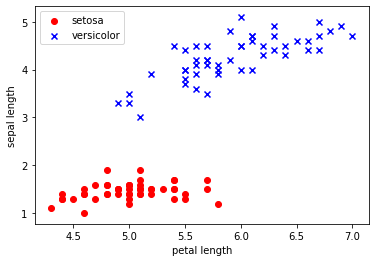

In [40]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

# Below we see a very clear linear separation between these two species.

In [45]:
# Wrapped everything in a Perceptron class.

class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter
    
    # rate- learning rate
    # niter - number of epochs

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # Weights which are randomly initialized.
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []

    # Iterations
    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

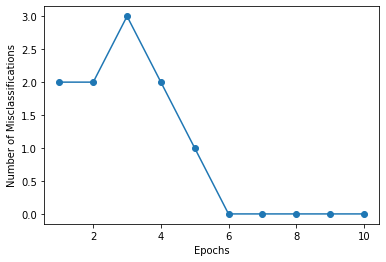

In [46]:
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.show()

# Below we see that as the number of epochs increases, the number of 
# misclassifications goes down. By 6 epochs, we are making 0 misclassifications.

In [43]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  # Setup marker generator and color map.
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # Plot the decision surface.
  x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # Plot the class samples.
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
    alpha=0.8, c=cmap(idx),
    marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


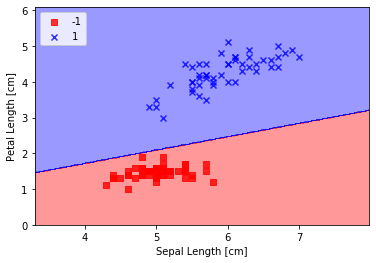

In [44]:
>>> plot_decision_regions(X, y, classifier=pn)
>>> plt.xlabel('Sepal Length [cm]')
>>> plt.ylabel('Petal Length [cm]')
>>> plt.legend(loc='upper left')
plt.show()

# We see the linear separability that our perceptron has learned.

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?